## The OOI RCA Shallow Profiler


This notebook is an introduction to the physical and bio-optical data from the Ocean Observatories 
Initiative (***OOI***) Regional Cabled Array (***RCA***) *Shallow Profiler* shown below. These
platforms are anchored to the sea floor and regularly sample the upper 200 meters of the 
ocean using profusion of sensors.


The bulbous pod in the photo (Science Pod or SCIP) is attached to the rectangular 
platform by means of a cable. The profiler ascends and then descends nine times per day.


<BR>
<img src="./../images/rca/shallow%20profiler%20platform%201%20in%20situ.png" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left"><BR>


Photo from the Remotely Operated Vehicle "Ropos" at a depth of 200 meters
    
    

    
    
<BR>
<img src="./../images/rca/shallow%20profiler%20platform%202%20OSB%20pool.png" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left"><BR>   

    
Shallow profiler in a test tank at the University of Washington

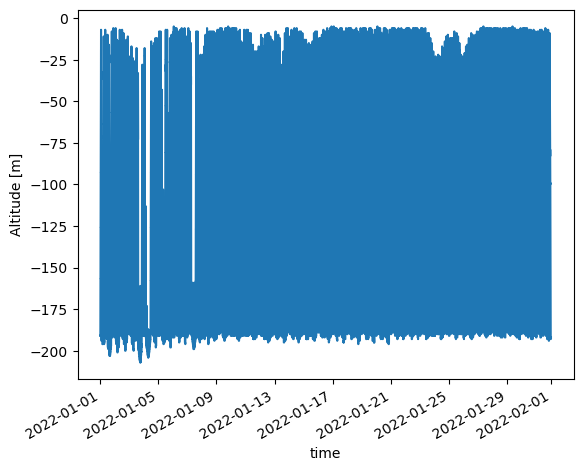

In [4]:
import xarray as xr
data_path = './../data/'
site='osb'
instrument='ctd'
sensor='temperature'
time='jan22'
fnmT = data_path + site + '_' + instrument + '_' + time + '_' + sensor + '.nc'
d={'temperature': xr.open_dataset(fnmT)}
d['temperature'].z.plot()

In [2]:
############################################################
# shallow profiler dive timestamp generator
############################################################
# Datasets extend over the full program from 2014 to download date Aug 2021.
# At first look they appear sampled at 1/minute but there are anomalies; 
#   so to have more confidence this code resamples them at "1Min".

def StandardizeNetCDFDataset(source_location, datafile):
    ds   = xr.open_dataset(source_location + datafile)
    ds   = ds.set_coords("time")
    ds   = ds.swap_dims({"row":"time"})
    df   = ds.to_dataframe().resample("1Min").mean()
    vals = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, attrs=ds[c].attrs) for c in df.columns]
    return xr.Dataset(dict(zip(df.columns, vals)), attrs=ds.attrs)

data_root = os.getenv("HOME") + '/data/data_ooi_data_explorer/'
out_root  = os.getenv("HOME") + '/data/data_explorer_1Min/'
sitekeys  = ['/axb/', '/oos/', '/osb/']
framekeys = ['/profiler/', '/platform/']
n_sites   = len(sitekeys)
n_frames  = len(framekeys)

for i in range(n_sites):
    for j in range(n_frames):
        this_data_path = data_root + sitekeys[i] + framekeys[j]
        this_out_path  = out_root + sitekeys[i] + framekeys[j]
        possible_datafiles = os.listdir(this_data_path)
        datafiles = []
        for poss in possible_datafiles:
            if poss.split('.')[1] == 'nc': datafiles.append(poss)      
        for datafile in datafiles:
            ds      = StandardizeNetCDFDataset(this_data_path, datafile)
            outfile = this_out_path + datafile.split('.')[0] + '_1Min.nc'
            ds.to_netcdf(outfile)
            print(datafile, '>', outfile, 'with size', ds.time.shape[0])


axb_profiler_backscatter.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_backscatter_1Min.nc with size 3608277
axb_profiler_cdom.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_cdom_1Min.nc with size 3608277
axb_profiler_chlora.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_chlora_1Min.nc with size 3608277
axb_profiler_density.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_density_1Min.nc with size 3608283
axb_profiler_doxygen.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_doxygen_1Min.nc with size 3608283
axb_profiler_nitrate.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_nitrate_1Min.nc with size 3607853
axb_profiler_par.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_par_1Min.nc with size 3598972
axb_profiler_pco2.nc > /mnt/d//data/data_explorer_1Min//axb//profiler/axb_profiler_pco2_1Min.nc with size 3607990
axb_profiler_ph.nc > /mnt/d//data/data_explorer_1Min//